In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xlsxwriter

import okama as ok

In [2]:
ok.__version__

'0.99'

In [22]:
ok.search('RGBI')

[['RGBITR.INDX',
  'RGBITR',
  'Russian Government Bond Index',
  'Russia',
  'INDX',
  'RUB',
  'INDEX']]

In [12]:
ok.search('OKID')

[['OKID.INDX',
  'OKID',
  'Russian bank deposit index OKID - all banks (RUB)',
  'Russia',
  'INDX',
  'RUB',
  'INDEX'],
 ['OKID10.INDX',
  'OKID10',
  'Russian bank deposit index OKID - TOP10 banks (RUB)',
  'Russia',
  'INDX',
  'RUB',
  'INDEX'],
 ['OKID_USD.INDX',
  'OKID_USD',
  'Russian bank deposit index OKID (USD)',
  'Russia',
  'INDX',
  'USD',
  'INDEX'],
 ['OKID_EUR.INDX',
  'OKID_EUR',
  'Russian bank deposit index OKID (EUR)',
  'Russia',
  'INDX',
  'EUR',
  'INDEX']]

In [35]:
ls = ['OKID.INDX', 'OKID10.INDX', 'OKID_USD.INDX', 'OKID_EUR.INDX']

In [36]:
all_indexes = ok.AssetList(ls, ccy='RUB')
all_indexes

symbols          [OKID.INDX, OKID10.INDX, OKID_USD.INDX, OKID_E...
currency                                                       RUB
first date                                                 2014-01
last_date                                                  2021-04
period length                                    7 years, 4 months
inflation                                                 RUB.INFL
dtype: object

<AxesSubplot:>

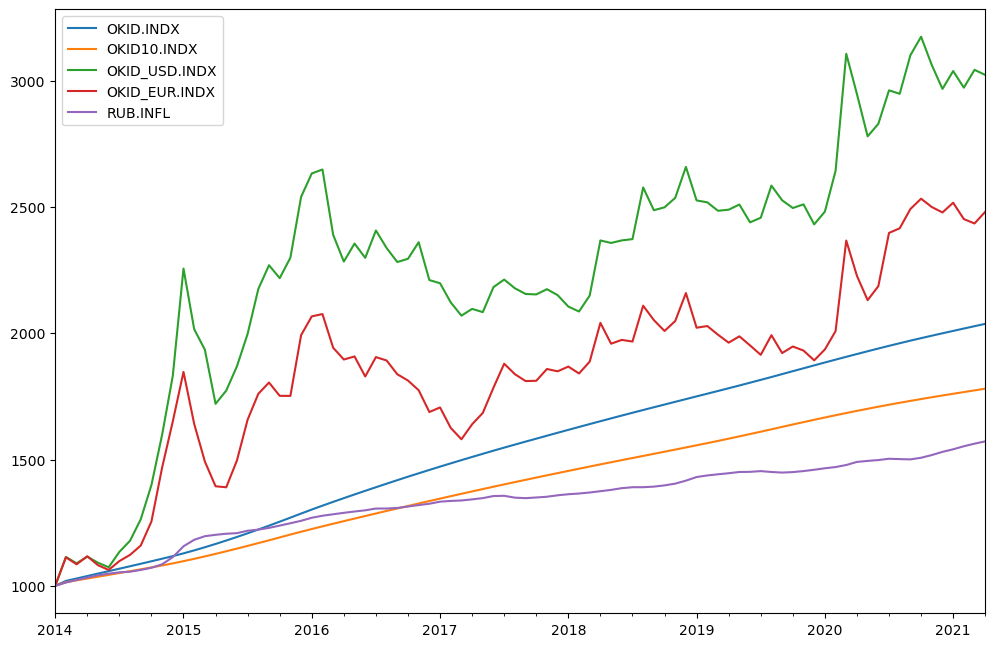

In [16]:
all_indexes.wealth_indexes.plot()

<AxesSubplot:>

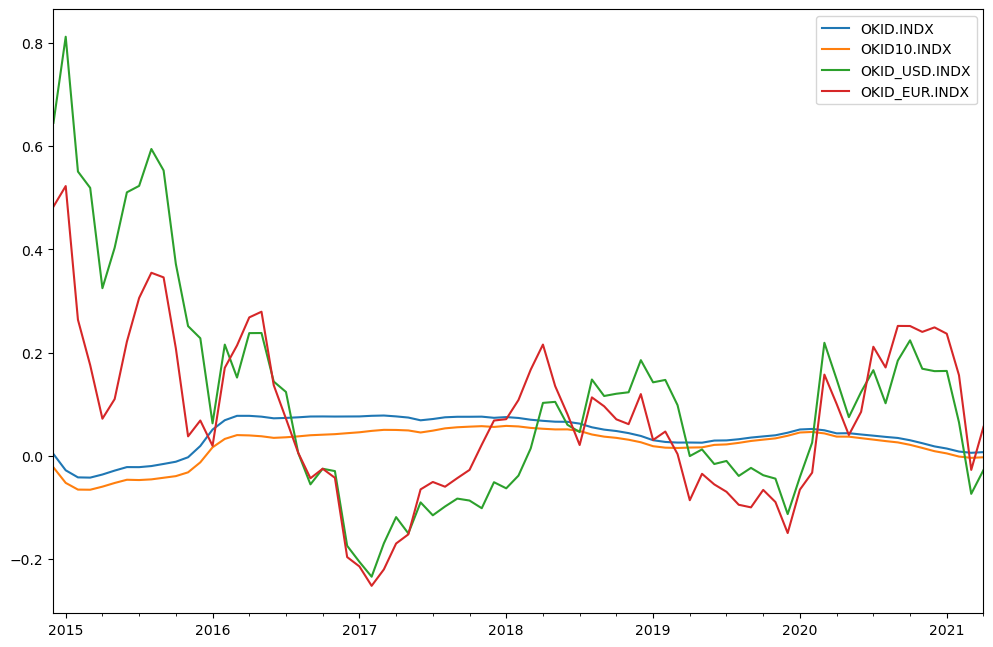

In [18]:
all_indexes.get_rolling_cagr(window=12, real=True).plot()

<AxesSubplot:>

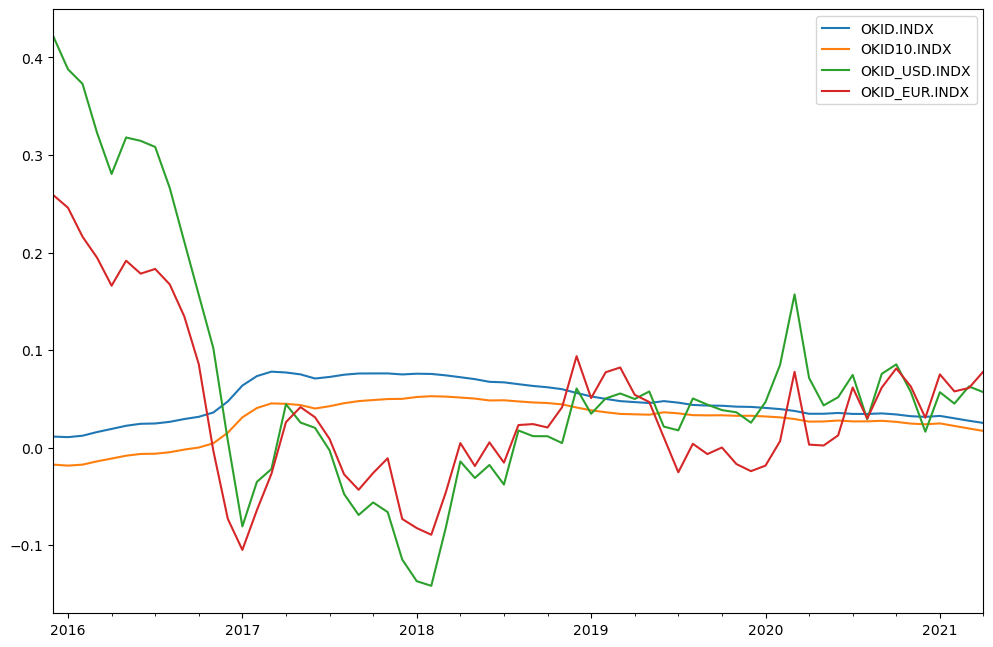

In [19]:
all_indexes.get_rolling_cagr(window=12*2, real=True).plot()

In [30]:
all_indexes.describe()

,property,period,OKID.INDX,OKID10.INDX,OKID_EUR.INDX,OKID_USD.INDX,inflation
0,Compound return,YTD,0.018730,0.015287,0.001042,0.018675,0.027172
1,CAGR,1 years,0.062311,0.051789,0.113876,0.025717,0.054564
2,CAGR,5 years,0.086237,0.072261,0.055242,0.057669,0.040485
3,CAGR,10 years,NaN,NaN,NaN,NaN,NaN
4,CAGR,"7 years, 4 months",0.101897,0.081831,0.131898,0.162806,0.063615
5,Dividend yield,LTM,0.000000,0.000000,0.000000,0.000000,NaN
6,Risk,"7 years, 4 months",0.008882,0.005736,0.207345,0.229148,NaN
7,CVAR,"7 years, 4 months",-0.062311,-0.051789,0.217122,0.198703,NaN
8,Max drawdowns,"7 years, 4 months",0.000000,0.000000,-0.247267,-0.237351,NaN
9,Max drawdowns dates,"7 years, 4 months",2014-01,2014-01,2015-05,2015-04,NaN


### OKID10 + OKID

Ставки банков ТОР-10

In [3]:
bk = ok.AssetList(['OKID10.INDX', 'OKID.INDX', 'RGBITR.INDX'], ccy='RUB')
bk

symbols          [OKID10.INDX, OKID.INDX, RGBITR.INDX]
currency                                           RUB
first date                                     2010-07
last_date                                      2021-04
period length                      10 years, 10 months
inflation                                     RUB.INFL
dtype: object

In [20]:
df = bk.wealth_indexes

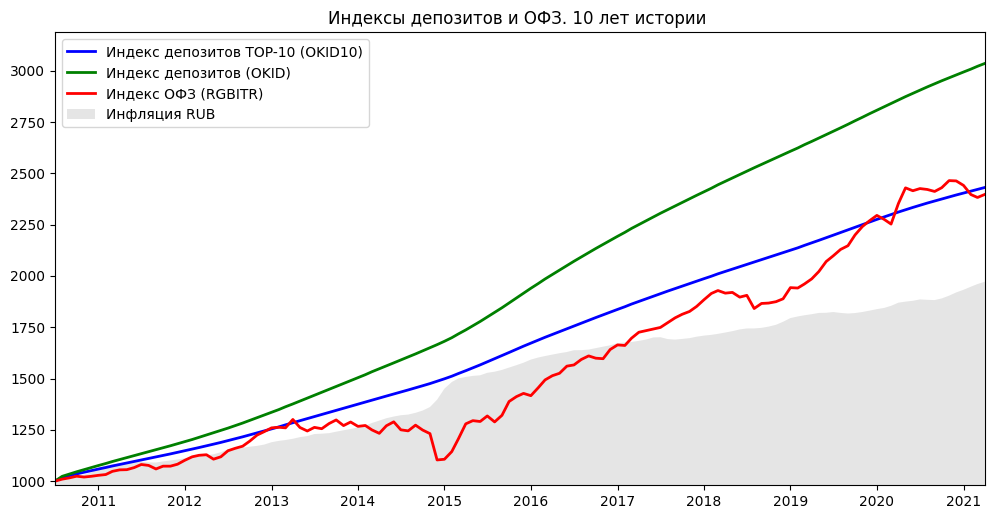

In [21]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['OKID10.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов TOP-10 (OKID10)')
ax.plot(df.index.to_timestamp(), df['OKID.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов (OKID)')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'red', linewidth = 2, label='Индекс ОФЗ (RGBITR)')

ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2010-07', '2021-04')
ax.set_ylim(980,)
ax.set_title('Индексы депозитов и ОФЗ. 10 лет истории ')
leg = ax.legend()

In [4]:
df = bk.get_rolling_cagr(window=12, real=True)

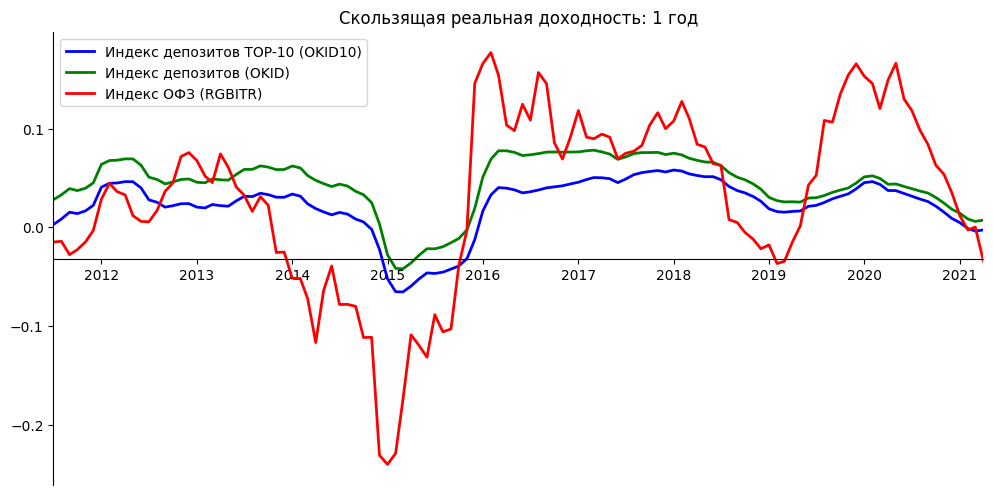

In [12]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['OKID10.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов TOP-10 (OKID10)')
ax.plot(df.index.to_timestamp(), df['OKID.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов (OKID)')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'red', linewidth = 2, label='Индекс ОФЗ (RGBITR)')

# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2011-07', '2021-04')
# ax.set_ylim(980,)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_title('Скользящая реальная доходность: 1 год')
leg = ax.legend()

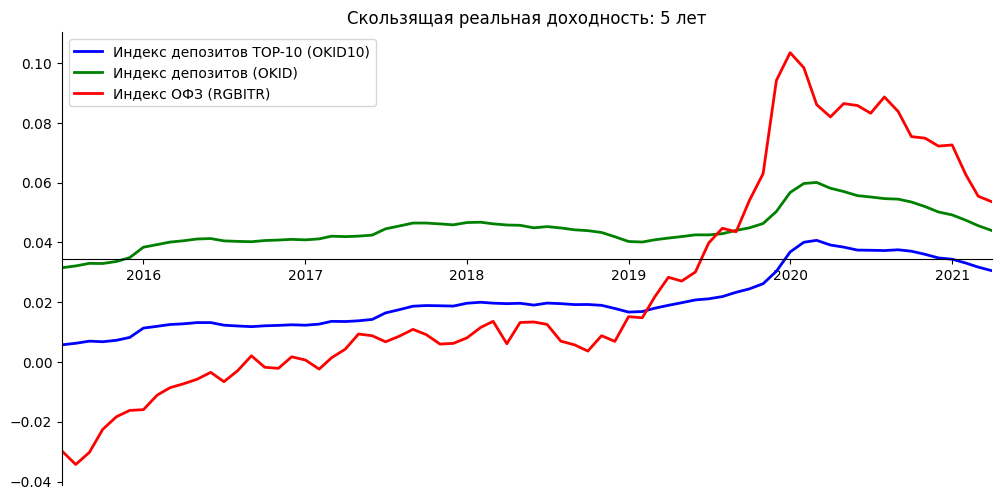

In [16]:
df = bk.get_rolling_cagr(window=12*5, real=True)

fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['OKID10.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов TOP-10 (OKID10)')
ax.plot(df.index.to_timestamp(), df['OKID.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов (OKID)')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'red', linewidth = 2, label='Индекс ОФЗ (RGBITR)')

# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2015-07', '2021-04')
# ax.set_ylim(980,)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_title('Скользящая реальная доходность: 5 лет')
leg = ax.legend()

In [45]:
bk.describe([1, 5, 8])

,property,period,OKID.INDX,OKID10.INDX,RGBITR.INDX,inflation
0,Compound return,YTD,0.018730,0.015287,-0.026683,0.027172
1,CAGR,1 years,0.062311,0.051789,0.018851,0.054564
2,CAGR,5 years,0.086237,0.072261,0.096264,0.040485
3,CAGR,8 years,0.103912,0.082999,0.079423,0.063306
4,CAGR,"10 years, 10 months",0.107922,0.085446,0.084046,0.064675
5,Dividend yield,LTM,0.000000,0.000000,0.000000,NaN
6,Risk,"10 years, 10 months",0.007971,0.005142,0.069425,NaN
7,CVAR,"10 years, 10 months",-0.062945,-0.052523,0.134969,NaN
8,Max drawdowns,"10 years, 10 months",0.000000,0.000000,-0.151628,NaN
9,Max drawdowns dates,"10 years, 10 months",2010-07,2010-07,2014-12,NaN


In [25]:
table = bk.describe([1, 5, 8])

In [26]:
table.iloc[:-4,2:] = table.iloc[:-4,2:] * 100

In [27]:
table

,property,period,OKID.INDX,OKID10.INDX,RGBITR.INDX,inflation
0,Compound return,YTD,1.87301,1.52868,-2.66829,2.71715
1,CAGR,1 years,6.23109,5.17892,1.88514,5.45641
2,CAGR,5 years,8.62366,7.22609,9.62636,4.04852
3,CAGR,8 years,10.3912,8.29986,7.9423,6.33058
4,CAGR,"10 years, 10 months",10.7922,8.54462,8.4046,6.46753
5,Dividend yield,LTM,0,0,0,NaN
6,Risk,"10 years, 10 months",0.79715,0.514161,6.94251,NaN
7,CVAR,"10 years, 10 months",-0.475714,-0.392857,3.72143,NaN
8,Max drawdowns,"10 years, 10 months",0,0,-15.1628,NaN
9,Max drawdowns dates,"10 years, 10 months",2010-07,2010-07,2014-12,NaN


In [28]:
writer = pd.ExcelWriter('okid_rub.xlsx', engine='xlsxwriter', date_format='mm-dd-yyyy')

In [29]:
table.to_excel(writer, sheet_name='Sheet1', index=False, float_format="%.2f")

In [30]:
writer.save()

### Ставки банков

In [5]:
ok.symbols_in_namespace('RATE')

,symbol,ticker,name,country,exchange,currency,type
0,RUS_EUR.RATE,RUS_EUR.RATE,Max deposit rates (EUR) in Russian banks,Russia,RATE,EUR,Bank rates
1,RUS_RUB.RATE,RUS_RUB.RATE,Max deposit rates (RUB) in Russian banks,Russia,RATE,RUB,Bank rates
2,RUS_RUB_TOP10.RATE,RUS_RUB_TOP10.RATE,Max deposit rates (RUB) in TOP-10 Russian banks,Russia,RATE,RUB,Bank rates
3,RUS_USD.RATE,RUS_USD.RATE,Max deposit rates (USD) in Russian banks,Russia,RATE,USD,Bank rates


In [17]:
rub = ok.Rate('RUS_RUB.RATE').values_ts
rub10 = ok.Rate('RUS_RUB_TOP10.RATE').values_ts

In [18]:
rub10

date
2009-07    0.1484
2009-08    0.1477
2009-09    0.1459
2009-10    0.1427
2009-11    0.1366
            ...  
2021-01    0.0449
2021-02    0.0451
2021-03    0.0457
2021-04    0.0472
2021-05    0.0494
Freq: M, Name: RUS_RUB_TOP10.RATE, Length: 143, dtype: float64

Text(0.5, 1.0, 'Лучшие ставки депозитов в рублях')

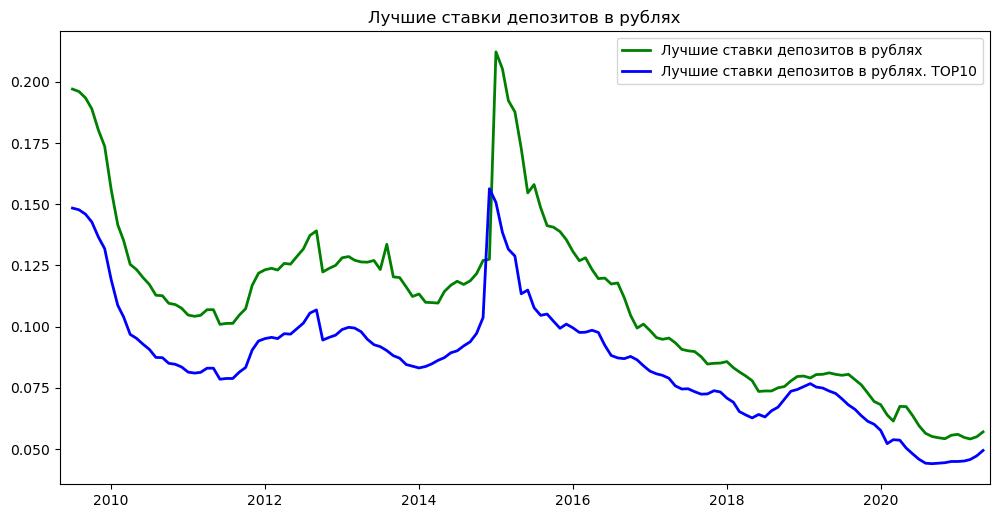

In [40]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(rub.index.to_timestamp(), rub.values, color = 'green', linewidth = 2, label='Лучшие ставки депозитов в рублях')
ax.plot(rub10.index.to_timestamp(), rub10.values, color = 'blue', linewidth = 2, label='Лучшие ставки депозитов в рублях. TOP10')
# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2009-05', '2021-06')
leg = ax.legend()
ax.set_title('Лучшие ставки депозитов в рублях')

In [23]:
usd = ok.Rate('RUS_USD.RATE').values_ts
eur = ok.Rate('RUS_EUR.RATE').values_ts

Text(0.5, 1.0, 'Лучшие ставки депозитов в USD и EUR')

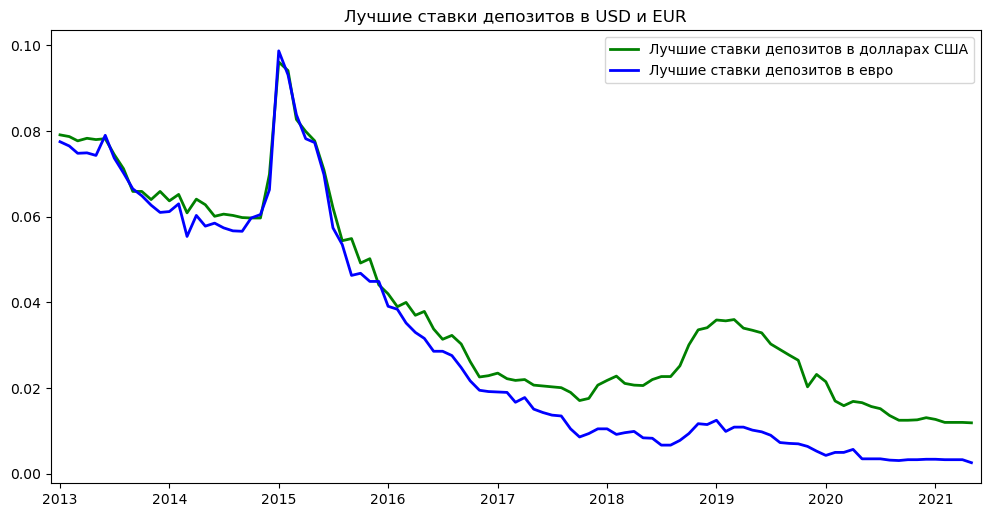

In [34]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(usd.index.to_timestamp(), usd.values, color = 'green', linewidth = 2, label='Лучшие ставки депозитов в долларах США')
ax.plot(eur.index.to_timestamp(), eur.values, color = 'blue', linewidth = 2, label='Лучшие ставки депозитов в евро')
# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2012-12', '2021-06')
leg = ax.legend()
ax.set_title('Лучшие ставки депозитов в USD и EUR')